# Using imscreenpy to assess differential drug responses

Now that we have generated a viability dataframe of differential drug responses with `qc_and_aggregate.ipynb`, we can start analysing drug responses from the resulting viability dataframe. This notebook demonstrates how imscreenpy can be used to score drug responses and plot dose response curves for different sub-populations.

In [1]:
## import required packages
import os
import sqlite3

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## load viability dataframe containing the number of viable cells per well for each marker of interest
via_df = pd.read_csv('./example_data/2121039-40_viabilities.csv')

C:\Users\Ben_H\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\imscreenpy\drug_scoring\drug_scoring.py:582: RuntimeWarning: Mean of empty slice
  mean_dose_response_values = np.nanmean(use_arr, axis=1)


Creating pharmacoscopy-style plot for 115 drugs and 115 scores


C:\Users\Ben_H\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\imscreenpy\hit_reporting.py:962: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_scores, y=sorted_drugs, ax=full_chart_axis, palette='coolwarm')
C:\Users\Ben_H\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\imscreenpy\hit_reporting.py:965: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scores, y=top_drugs, ax=top_chart_axis, palette='coolwarm')
C:\Users\Ben_H\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python31

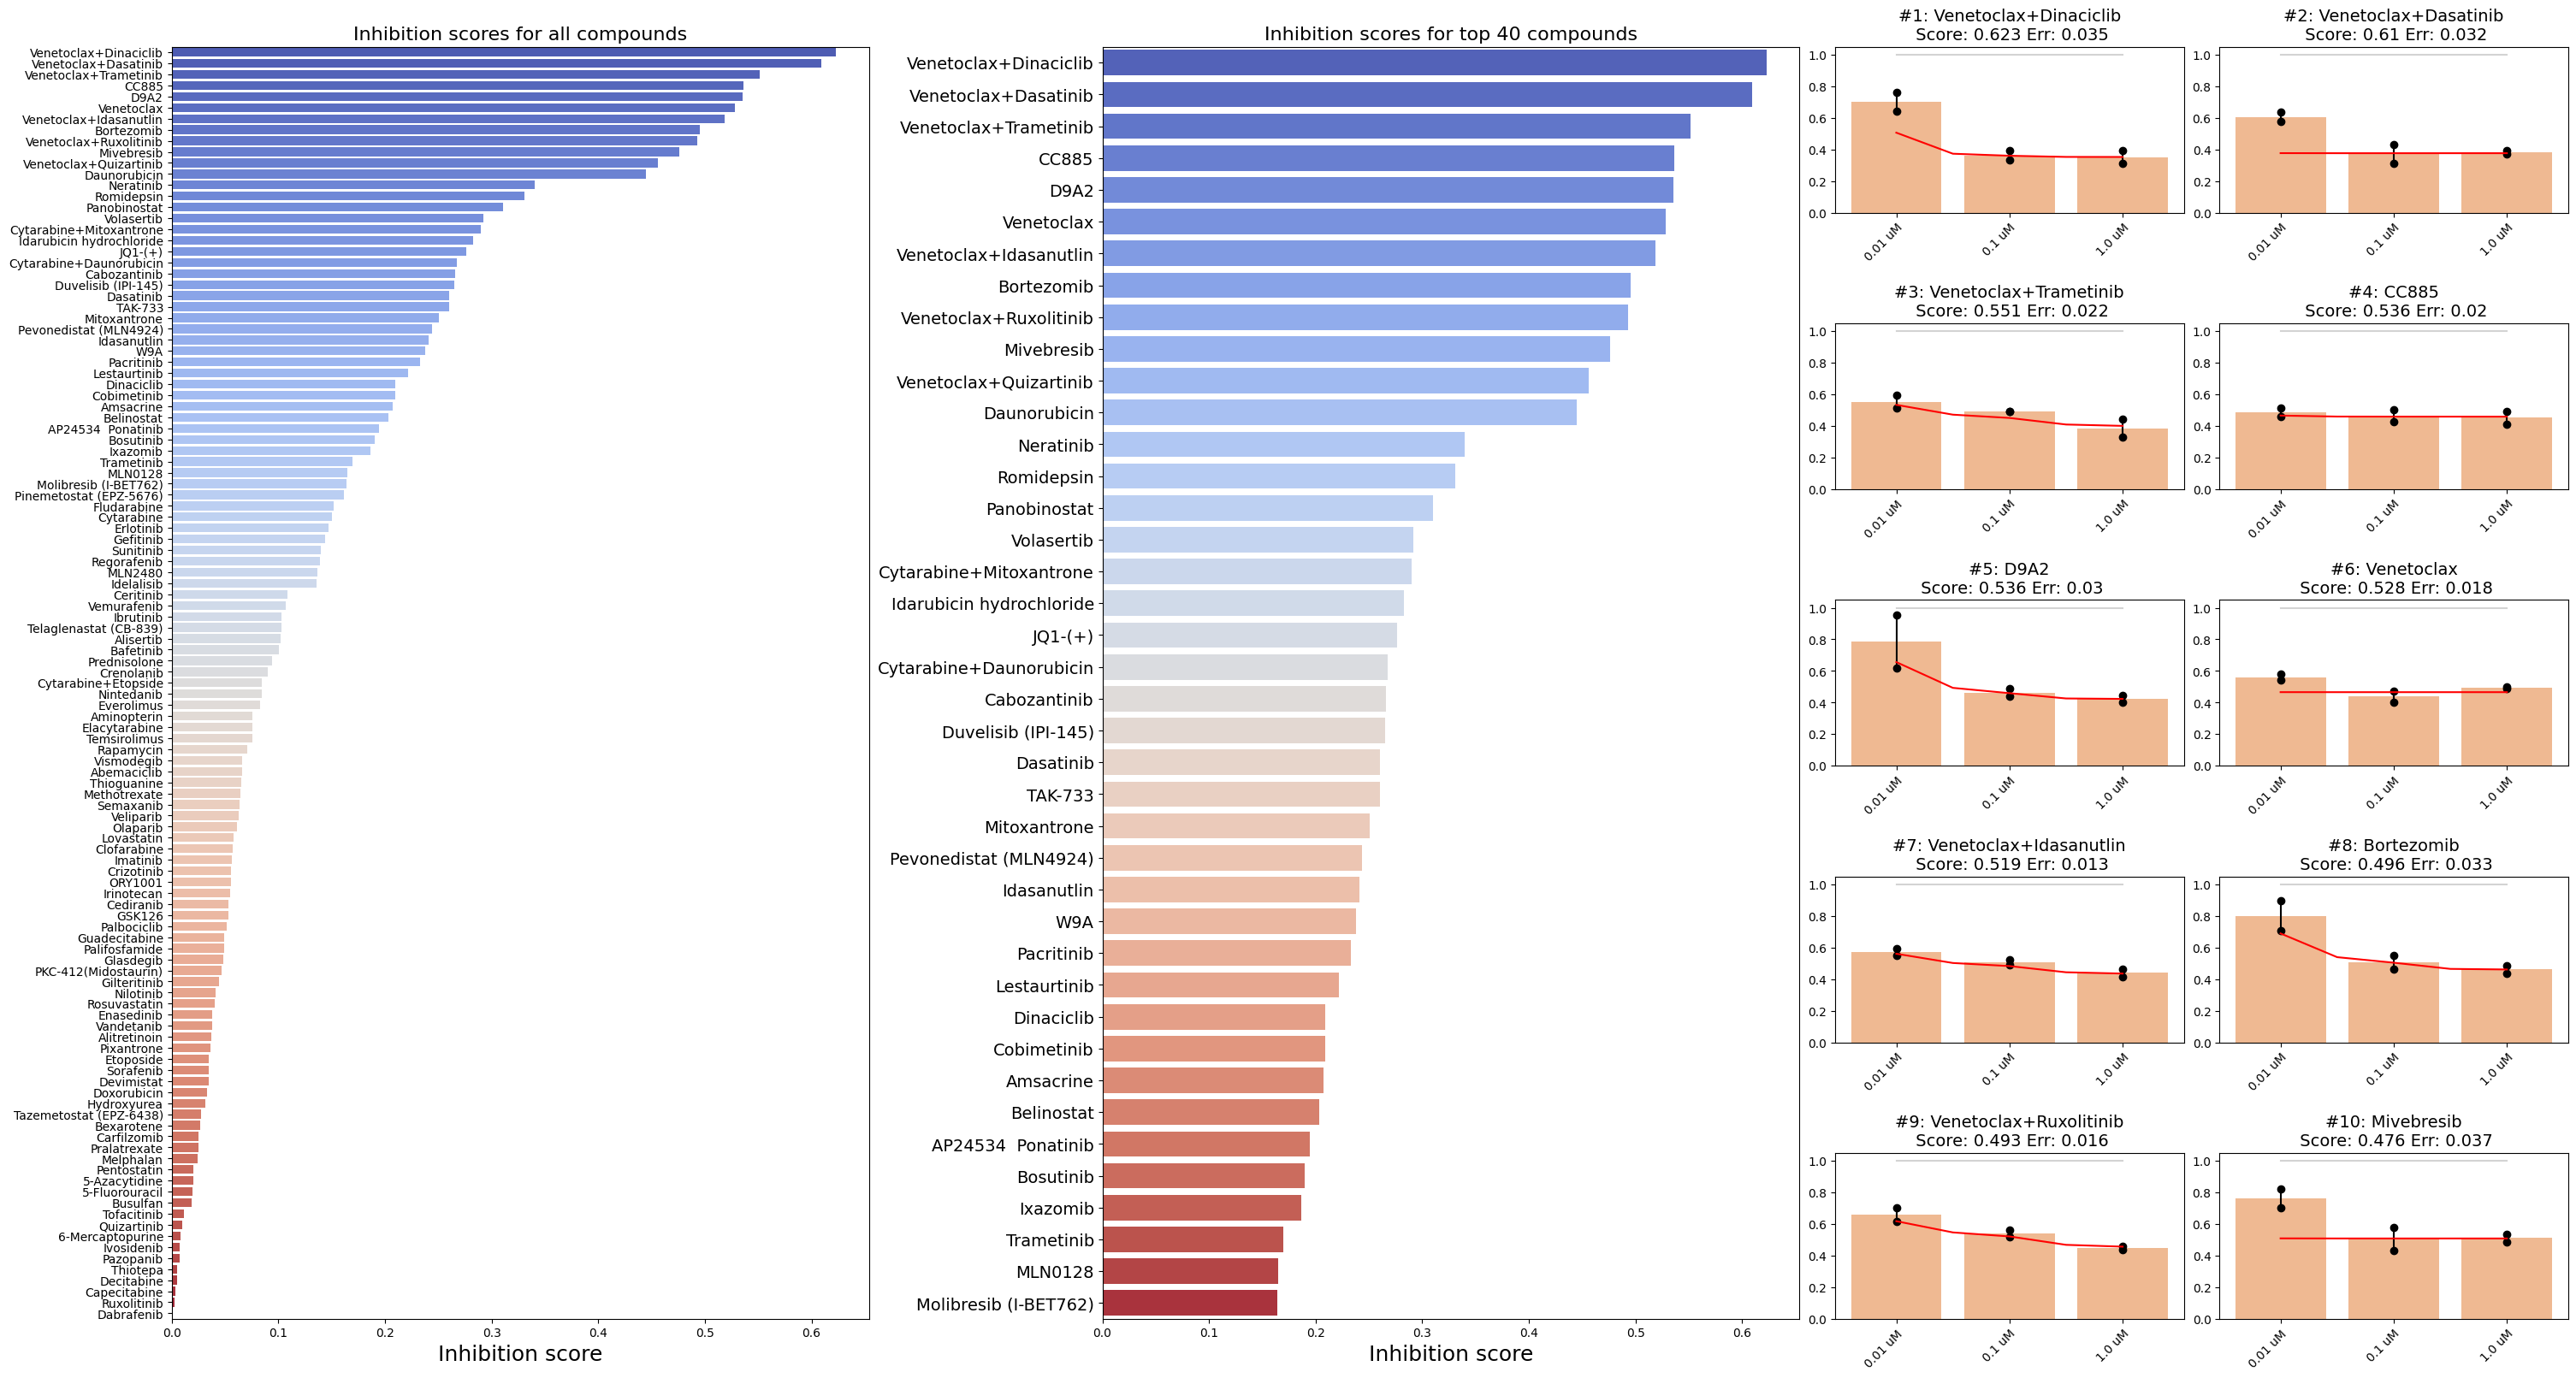

In [3]:
## Let's run qc on the cellnumbers and then look at the drug responses for some of the markers
from imscreenpy.qc import qc_functions
from imscreenpy.hit_reporting import LDTable_InhibitionReport


### run qc on the viability dataframe

def run_qc(viability_table, qc_param_dict, qc_cols):
    out_viability_table = qc_functions.filter_implausible_cellnumbers(viability_table, target_column=qc_cols, n_stds=4)
    out_viability_table = qc_functions.filter_bad_replicates(out_viability_table, frac_diff=qc_param_dict['max_frac_diff_per_replicate'], prev_frac_diff=None, prev_frac_diff_single=qc_param_dict['max_prev_frac_diff_per_replicate'], subsetting_column=None, target_columns=qc_cols, verbose=False, min_n_replicates=1)
    out_viability_table = qc_functions.cap_population_numbers(out_viability_table, qc_cols, subsetting_column='Plate', verbose=False)
    out_viability_table = qc_functions.filter_drugs_by_avg_error(out_viability_table, target_columns=qc_cols, frac_diff=qc_param_dict['max_frac_diff_per_replicate'], verbose=False)
    return out_viability_table



## we exclude drugs for which we have less than 3 wells per drug, where the average difference between replicates is larger than 0.4, and where the average difference between replicates is larger than 0.5 for any single replicate.
## we further filter out drugs with more than 4 standard deviations from the mean cell number, and we filter out drugs where the average difference between replicates is larger than 0.4.
qc_param_dict = dict(min_n_wells_per_drug=3, max_frac_diff_per_replicate=0.4, max_prev_frac_diff_per_replicate=0.5, n_stds_upper_limit=4, avg_filter_threshold=0.4)
target_population_marker = 'CD34'
populations_to_consider = ['NumberOfCells', 'NumberOfCells_{}'.format(target_population_marker), 'NumberOfCells_CD3'] 
via_df_postqc = run_qc(via_df, qc_param_dict, qc_cols=populations_to_consider)
## make pharmacoscopy style plot on all cells
all_cells_report = LDTable_InhibitionReport(via_df_postqc, verbose=False, run_initial_qc=False)
all_cells_report.pharmacoscopy_style_plot('NumberOfCells', 'Drug scores all cells', savetitle=None, plot_all_bars=False, do_abs=True)

C:\Users\Ben_H\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\imscreenpy\drug_scoring\drug_scoring.py:582: RuntimeWarning: Mean of empty slice
  mean_dose_response_values = np.nanmean(use_arr, axis=1)


Creating pharmacoscopy-style plot for 115 drugs and 115 scores


C:\Users\Ben_H\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\imscreenpy\hit_reporting.py:962: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_scores, y=sorted_drugs, ax=full_chart_axis, palette='coolwarm')
C:\Users\Ben_H\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\imscreenpy\hit_reporting.py:965: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scores, y=top_drugs, ax=top_chart_axis, palette='coolwarm')
C:\Users\Ben_H\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python31

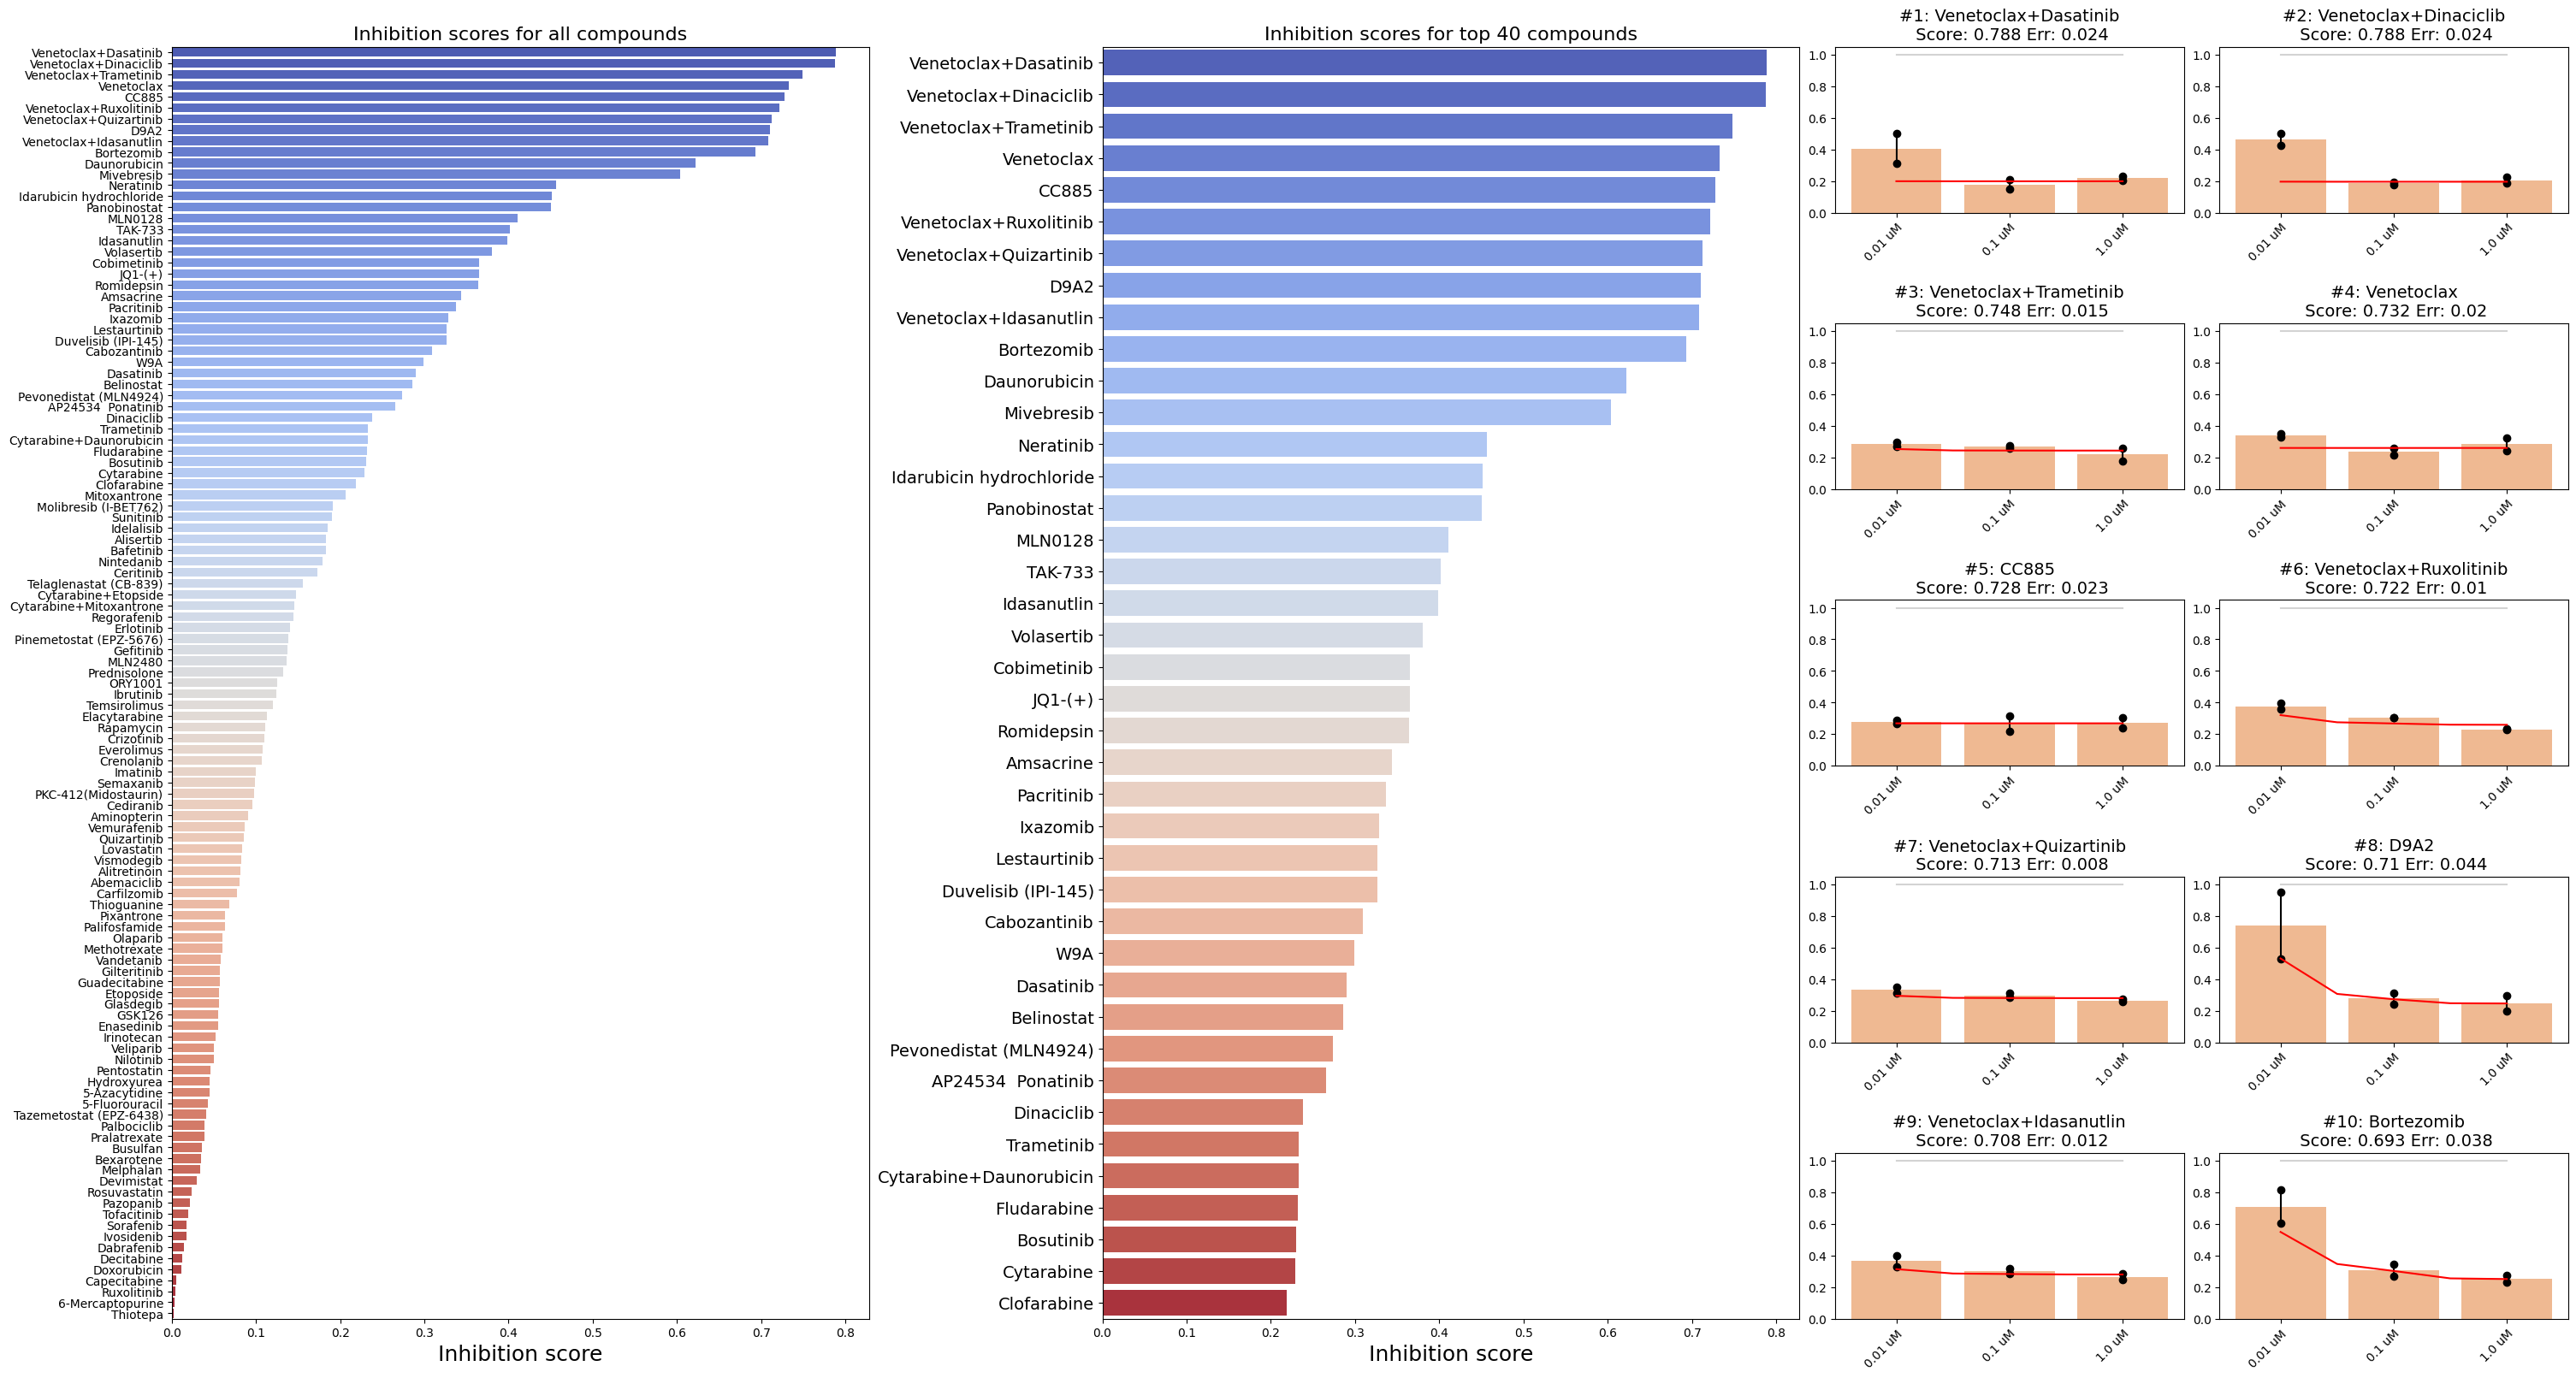

In [4]:
## make pharmacoscopy style plot on target cells
target_cells_report = LDTable_InhibitionReport(via_df_postqc, verbose=False, run_initial_qc=False)
target_cells_report.pharmacoscopy_style_plot(target_population_marker, 'Drug scores {} cells'.format(target_population_marker), savetitle=None, plot_all_bars=False, do_abs=True)

The plots above show the overall distribution of drug responses for this particular sample, but we can also use imscreenpy to compare dose response curves for the same drug and different sub-populations. A few examples are shown below

C:\Users\Ben_H\AppData\Local\Temp\ipykernel_24296\3390956484.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


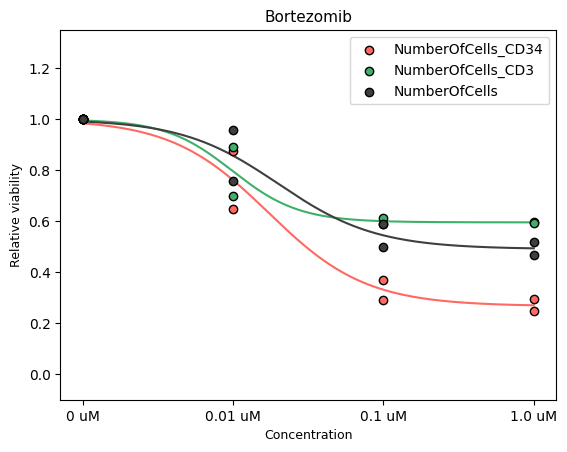

In [5]:
## we can also plot dose response curves for a given drug and a number of target populations of interest
## note that all cell numbers are normalized to the negative DMSO control here, so this plot is not reflecting the different abundancies of these populations
from imscreenpy.drug_scoring.plotting import plot_response_curve
   
fig = plot_response_curve(via_df_postqc, ['NumberOfCells_CD34', 'NumberOfCells_CD3', 'NumberOfCells'], 'Bortezomib')
fig.show()

C:\Users\Ben_H\AppData\Local\Temp\ipykernel_24296\3013719269.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


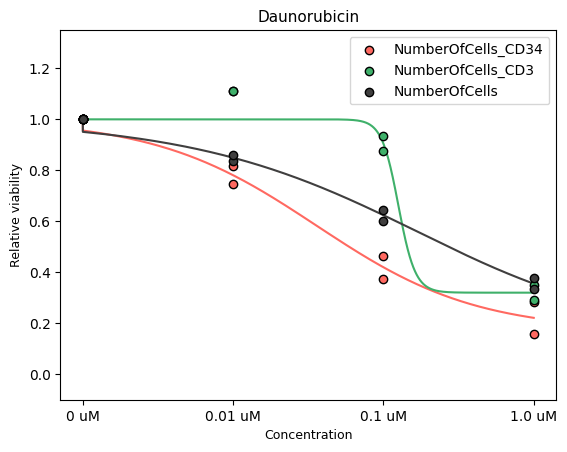

In [6]:
fig = plot_response_curve(via_df_postqc, ['NumberOfCells_CD34', 'NumberOfCells_CD3', 'NumberOfCells'], 'Daunorubicin')
fig.show()